# Introduction to PySWMM

- PySWMM is a Python language software package for the creation, manipulation, 
and study of the structure, dynamics, and function of complex networks
- PySWMM can load and manipulate USEPA Stormwater Management Models
- PySWMM is used by engineers, modelers, and researchers who want to streamline stormwater modeling optimization, controls, and post-processing results
- PySWMM is intended to provide:
    1. Tools for the study of the structure and dynamics within USEPA SWMM5
    1. A standard programming interface and graph implementation that is suitable for many applications
    1. A rapid development environment for collaborative, multidisciplinary projects
    1. An interface to USEPA SWMM5
    1. Development and implementation of control logic outside of native EPA-SWMM Controls
    1. Methods for users to establish their own node inflows
    1. A coding interface to binary output files
    1. New modeling possibilities for the SWMM5 Community

# 1. Install PySWMM

In [ ]:
# Install PySWMM
!pip install pyswmm

# 2. Check PySWMM

In [ ]:
import pyswmm
help(pyswmm)

# 3. Import Libraries

In [ ]:
from pyswmm import Simulation
from pyswmm import Nodes
from pyswmm import Links
from pyswmm import Subcatchments
from pyswmm import RainGages
import matplotlib.pyplot as plt

# 4. Specify SWMM file

In [ ]:
data_file = "SWMM_Colab.inp"

# 5. Load and Run SWMM Model

In [ ]:
# Load SWMM model, run, and get simulation current time
with Simulation(data_file) as sim:
    for step in sim:
        #print(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))
        pass

# 6. Nodes in PySWMM

In [ ]:
# Load and Get number of Nodes
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    n_node = []
    for node in node_object:
        n_node.append(node)
    print('Number of Nodes: ', len(n_node))

In [ ]:
# Get Name of Nodes
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    name_node = []
    for node in node_object:
        name_node.append(node.nodeid)
    print(name_node)

In [ ]:
# Check Node type
# Return True or False
node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)[node_n]
    print('Junction:', node_object.is_junction())
    print('Divider:', node_object.is_divider())
    print('Outfall:', node_object.is_outfall())
    print('Storage Unit:', node_object.is_storage())

### 6.1. Get-Set Functions

In [ ]:
# Get/Set Invert Elevation of Node '55909'
# Return float values

node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    invert_elev_before = node_object[node_n].invert_elevation
    node_object[node_n].invert_elevation = 20
    invert_elev_after = node_object[node_n].invert_elevation
    print('Invert Elevation before: ', invert_elev_before)
    print('Invert Elevation after: ', invert_elev_after)

In [ ]:
# Get/Set Max. Depth of Node '55909'
# Return float values

node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    full_depth_before = node_object[node_n].full_depth
    node_object[node_n].full_depth = 20
    full_depth_after = node_object[node_n].full_depth
    print('Max. Depth before: ', full_depth_before)
    print('Max. Depth after: ', full_depth_after)

In [ ]:
# Get/Set Initial Depth of Node '55909'
# Return float values

node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    initial_depth_before = node_object[node_n].initial_depth
    node_object[node_n].initial_depth = 20
    initial_depth_after = node_object[node_n].initial_depth
    print('Initial Depth before: ', initial_depth_before)
    print('Initial Depth after: ', initial_depth_after)

In [ ]:
# Get/Set Surcharge Depth of Node '55909'
# Return float values

node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    sur_charge_before = node_object[node_n].surcharge_depth
    node_object[node_n].surcharge_depth = 20
    sur_charge_after = node_object[node_n].surcharge_depth
    print('Surcharge Depth before: ', sur_charge_before)
    print('Surcharge Depth after: ', sur_charge_after)

In [ ]:
# Get/Set Ponding Area of Node '55909'
# Return float values

node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    pond_area_before = node_object[node_n].ponding_area
    node_object[node_n].ponding_area = 20
    pond_area_after = node_object[node_n].ponding_area
    print('Ponded Area before: ', pond_area_before)
    print('Ponded Area after: ', pond_area_after)

In [ ]:
# Generate Inflow into Node '55909'

node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    n_new, total_inflow_new = [], []
    sim.step_advance(300)
    for step in sim:
        n_new.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))
        node_object[node_n].generated_inflow(0.2)
        total_inflow_new.append(node_object[node_n].total_inflow)

### 6.2. Get Simulation Results

In [ ]:
# Get Results for Total Inflow of Node '55909'
# Return float values

node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    n, total_inflow = [],[]
    sim.step_advance(300)
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        total_inflow.append(node_object[node_n].total_inflow)

In [ ]:
# Plot total inflow

plt.plot(n, total_inflow)
plt.xticks(n[::20], rotation=90)
plt.xlabel('Time', fontsize=15) 
plt.ylabel('Total Inflow (LPS)', fontsize=15)
plt.title("Total inflow at Node " +  node_n + " calculated from PySWMM", fontsize=20)
plt.show()

Total inflow at Node 55909 from SWMM
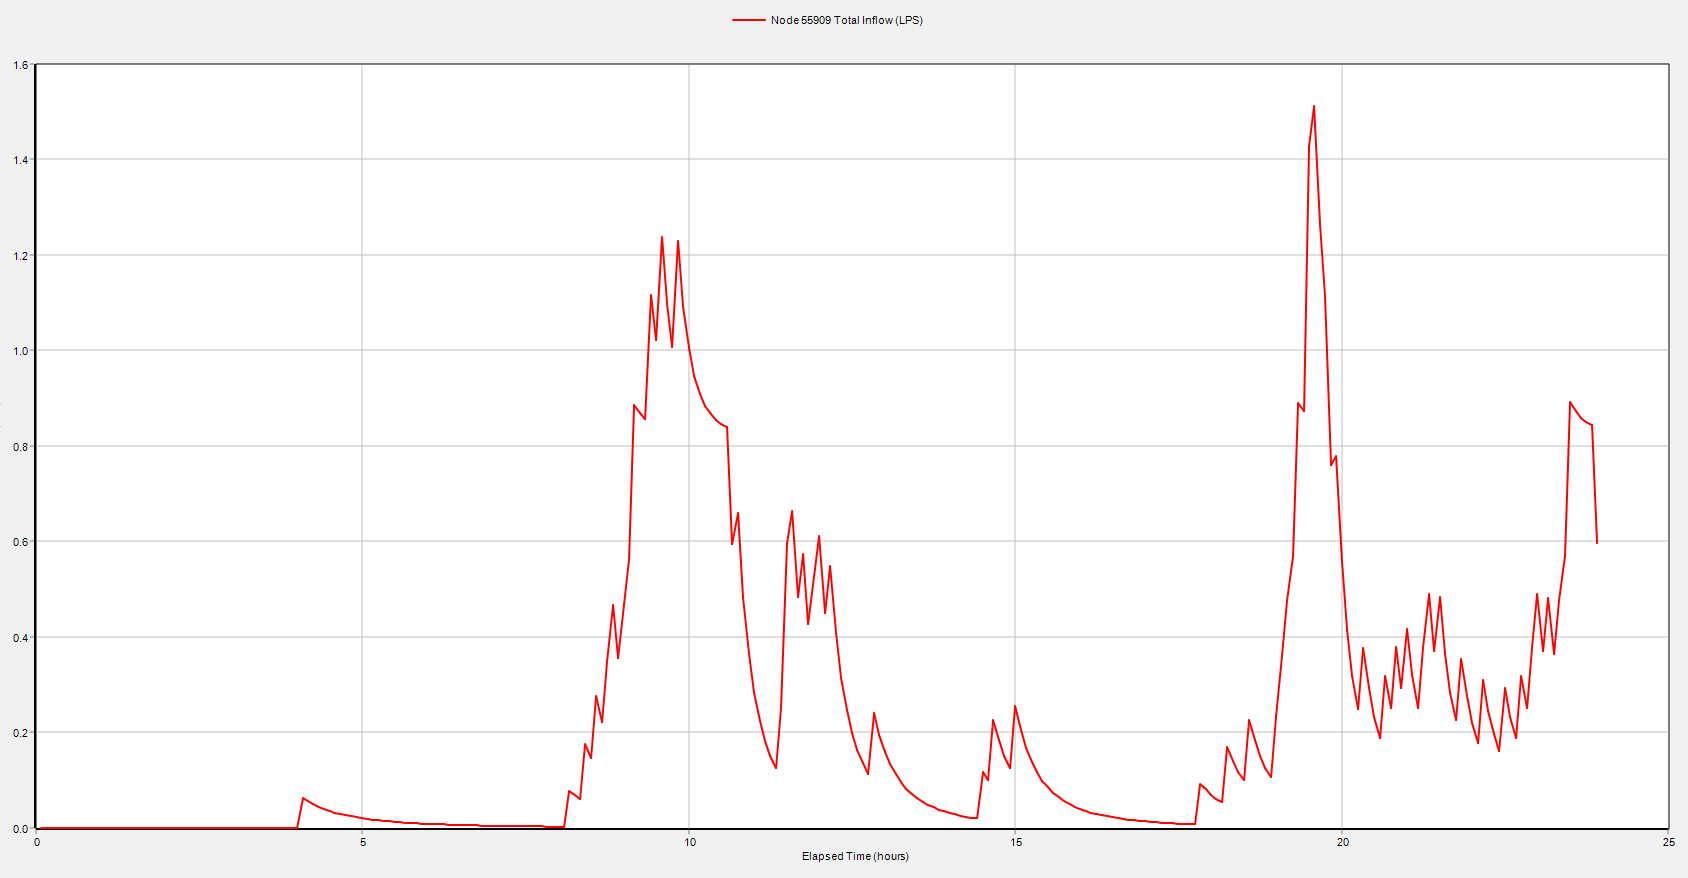

In [ ]:
# Compare flow at Node '55909' before and after adding inflow

plt.plot(total_inflow, label='Before add Inflow to Node')
plt.plot(total_inflow_new, label='After add Inflow to Node')
#plt.xticks(n_new[::20], rotation=90)
plt.xlabel('Time Step', fontsize=15) 
plt.ylabel('Total Inflow (LPS)', fontsize=15)
plt.title("Compare total inflow at Node " +  node_n, fontsize=20)
plt.legend()
plt.show()

In [ ]:
# Get Results for Total Outflow of Node '55909'
# Return float values

node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    n, total_outflow = [],[]
    sim.step_advance(300)
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        total_outflow.append(node_object[node_n].total_outflow)

In [ ]:
# Plot total outflow

plt.plot(n, total_outflow)
plt.xticks(n[::20], rotation=90)
plt.xlabel('Time', fontsize=15) 
plt.ylabel('Total Outflow (LPS)', fontsize=15)
plt.title("Total outflow at Node " +  node_n + " calculated from PySWMM", fontsize=20)
plt.show()

In [ ]:
# Get Results for Depth of Node '55909'
# Return float values

node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    n, depth = [],[]
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        depth.append(node_object[node_n].depth)

In [ ]:
# Get Results for Volume of Node '55909'
# Return float values

node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    n, volume = [],[]
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        volume.append(node_object[node_n].volume)

In [ ]:
# Get Results for Flooding Rate of Node '55909'
# Return 0 (no flood) or 1 (flood)

node_n = '55909'
with Simulation(data_file) as sim:
    node_object = Nodes(sim)
    n, flood = [],[]
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        flood.append(node_object[node_n].flooding)

# 7. Links in PySWMM

In [ ]:
# Load and Get number of Links

with Simulation(data_file) as sim:
    link_object = Links(sim)
    n_link = []
    for link in link_object:
        n_link.append(link)
    print('Number of Nodes: ', len(n_link))

In [ ]:
# Get Name of Links

with Simulation(data_file) as sim:
    link_object = Links(sim)
    name_link = []
    for link in link_object:
        name_link.append(link.linkid)
    #print(name_link)

In [ ]:
# Check Link type

link_n = '99722'
with Simulation(data_file) as sim:
    link_object = Links(sim)[link_n]
    print('Conduit:', link_object.is_conduit())
    print('Orifice:', link_object.is_orifice())
    print('Outlet:', link_object.is_outlet())
    print('Pump:', link_object.is_pump())
    print('Weir:', link_object.is_weir())

In [ ]:
# Check Inlet Node and Outlet Node of Link

link_n = '99722'
with Simulation(data_file) as sim:
    link_object = Links(sim)[link_n]
    in_node = link_object.inlet_node
    out_node = link_object.outlet_node
    print('Link:', link_n)
    print('Inlet Node:', in_node)
    print('Outlet Node:', out_node)   

### 7.1. Get-Set Functions

In [ ]:
# Get/Set Inlet Offset of Links 56177

link_n = '56177'
with Simulation(data_file) as sim:
    link_object = Links(sim)
    inlet_offset_before = link_object[link_n].inlet_offset
    link_object[link_n].inlet_offset = 20
    inlet_offset_after = link_object[link_n].inlet_offset
    print('Inlet Offset before: ', inlet_offset_before)
    print('Inlet Offset after: ', inlet_offset_after)

In [ ]:
# Get/Set Outlet Offset of Links 56177

link_n = '56177'
with Simulation(data_file) as sim:
    link_object = Links(sim)
    outlet_offset_before = link_object[link_n].outlet_offset
    link_object[link_n].outlet_offset = 20
    outlet_offset_after = link_object[link_n].outlet_offset
    print('Outlet Offset before: ', outlet_offset_before)
    print('Outlet Offset after: ', outlet_offset_after)

In [ ]:
# Get/Set Initial Flow of Links 56177

link_n = '56177'
with Simulation(data_file) as sim:
    link_object = Links(sim)
    ini_flow_before = link_object[link_n].initial_flow
    link_object[link_n].initial_flow = 20
    ini_flow_after = link_object[link_n].initial_flow
    print('Initial Flow before: ', ini_flow_before)
    print('Initial Flow after: ', ini_flow_after)

In [ ]:
# Get/Set Maximum Flow of Links 56177

link_n = '56177'
with Simulation(data_file) as sim:
    link_object = Links(sim)
    max_flow_before = link_object[link_n].flow_limit
    link_object[link_n].flow_limit = 20
    max_flow_after = link_object[link_n].flow_limit
    print('Maximum Flow before: ', max_flow_before)
    print('Maximum Flow after: ', max_flow_after)

In [ ]:
# Get/Set Entry Loss Coeff. of Links 56177

link_n = '56177'
with Simulation(data_file) as sim:
    link_object = Links(sim)
    entry_loss_before = link_object[link_n].inlet_head_loss
    link_object[link_n].inlet_head_loss = 20
    entry_loss_after = link_object[link_n].inlet_head_loss
    print('Entry Loss Coefficient before: ', entry_loss_before)
    print('Entry Loss Coefficient after: ', entry_loss_after)

In [ ]:
# Get/Set Exit Loss Coeff. of Links 56177

link_n = '56177'
with Simulation(data_file) as sim:
    link_object = Links(sim)
    outlet_loss_before = link_object[link_n].outlet_head_loss
    link_object[link_n].outlet_head_loss = 20
    outlet_loss_after = link_object[link_n].outlet_head_loss
    print('Exit Loss Coefficient before: ', outlet_loss_before)
    print('Exit Loss Coefficient after: ', outlet_loss_after)

In [ ]:
# Get/Set Average Loss Coeff. of Links 56177

link_n = '56177'
with Simulation(data_file) as sim:
    link_object = Links(sim)
    ave_loss_before = link_object[link_n].average_head_loss
    link_object[link_n].average_head_loss = 20
    ave_loss_after = link_object[link_n].average_head_loss
    print('Average Loss Coefficient before: ', ave_loss_before)
    print('Average Loss Coefficient after: ', ave_loss_after)

### 7.2. Get Simulation Results

In [ ]:
# Get Results for Flow of Links 56177

link_n = '56177'
with Simulation(data_file) as sim:
    link_object = Links(sim)
    n, flow = [],[]
    sim.step_advance(300)
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        flow.append(link_object[link_n].flow)

In [ ]:
# Plot flow in link

plt.plot(n, flow)
plt.xticks(n[::20], rotation=90)
plt.xlabel('Time', fontsize=15) 
plt.ylabel('Flow (LPS)', fontsize=15)
plt.title("Flow at Link " +  link_n + " calculated from PySWMM", fontsize=20)
plt.show()

Flow at Link 56177 from SWMM
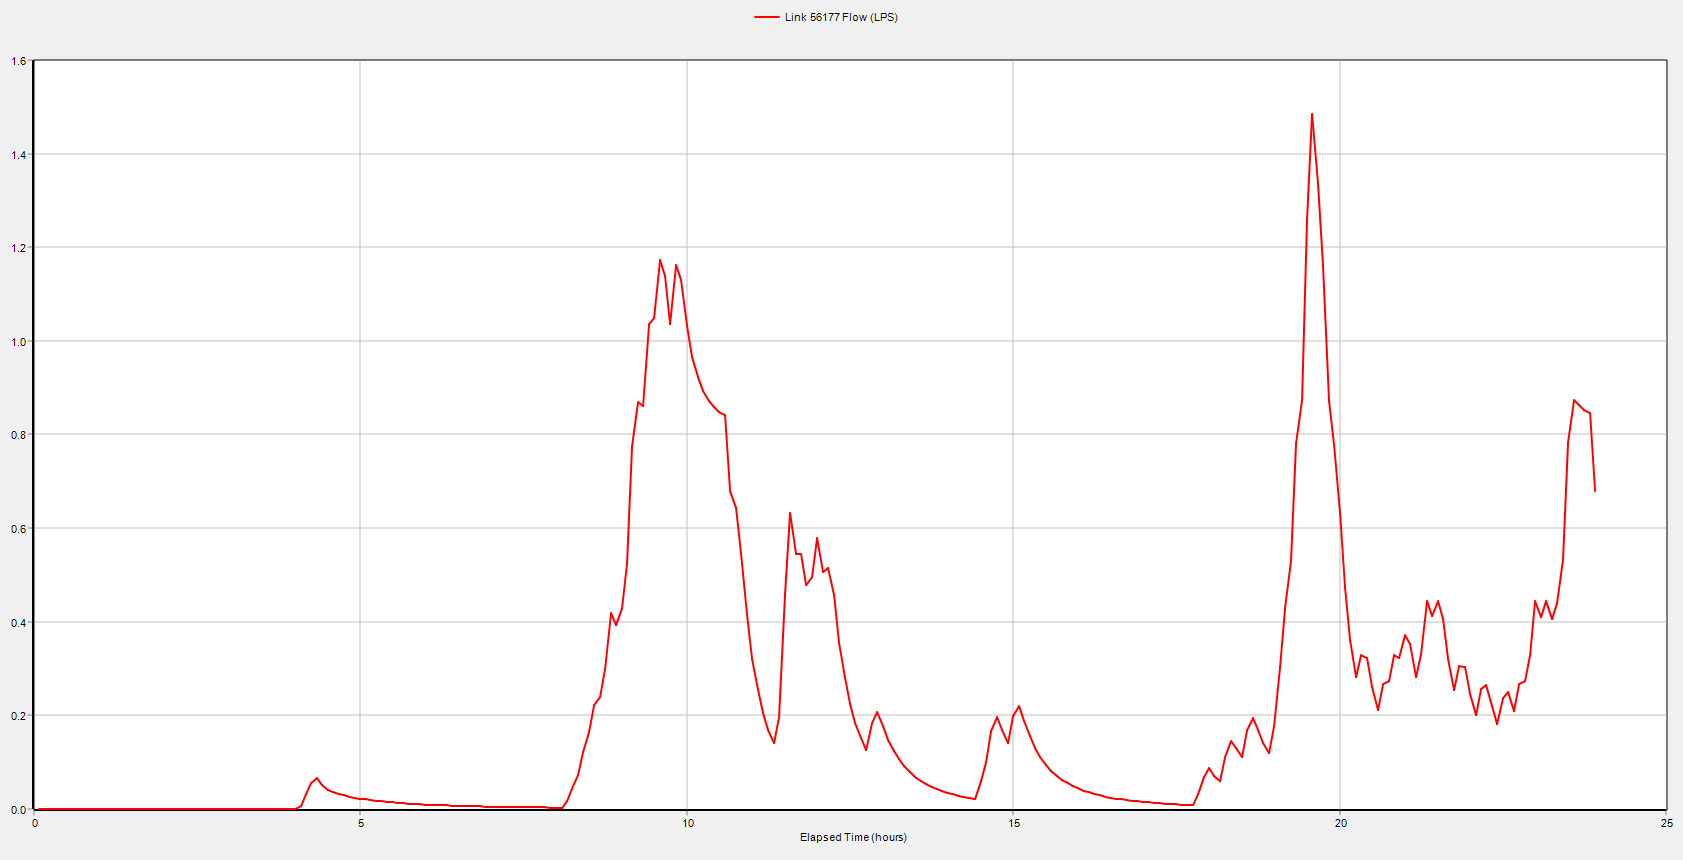

In [ ]:
# Get Results for Depth of Links 56177

link_n = '56177'
with Simulation(data_file) as sim:
    link_object = Links(sim)
    n, depth = [],[]
    sim.step_advance(300)
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        depth.append(link_object[link_n].depth)

In [ ]:
# Plot link's depth

plt.plot(n, depth)
plt.xticks(n[::20], rotation=90)
plt.xlabel('Time', fontsize=15) 
plt.ylabel('Depth (m)', fontsize=15)
plt.title("Depth at Link " +  link_n + " calculated from PySWMM", fontsize=20)
plt.show()

Depth at Link 56177 from SWMM

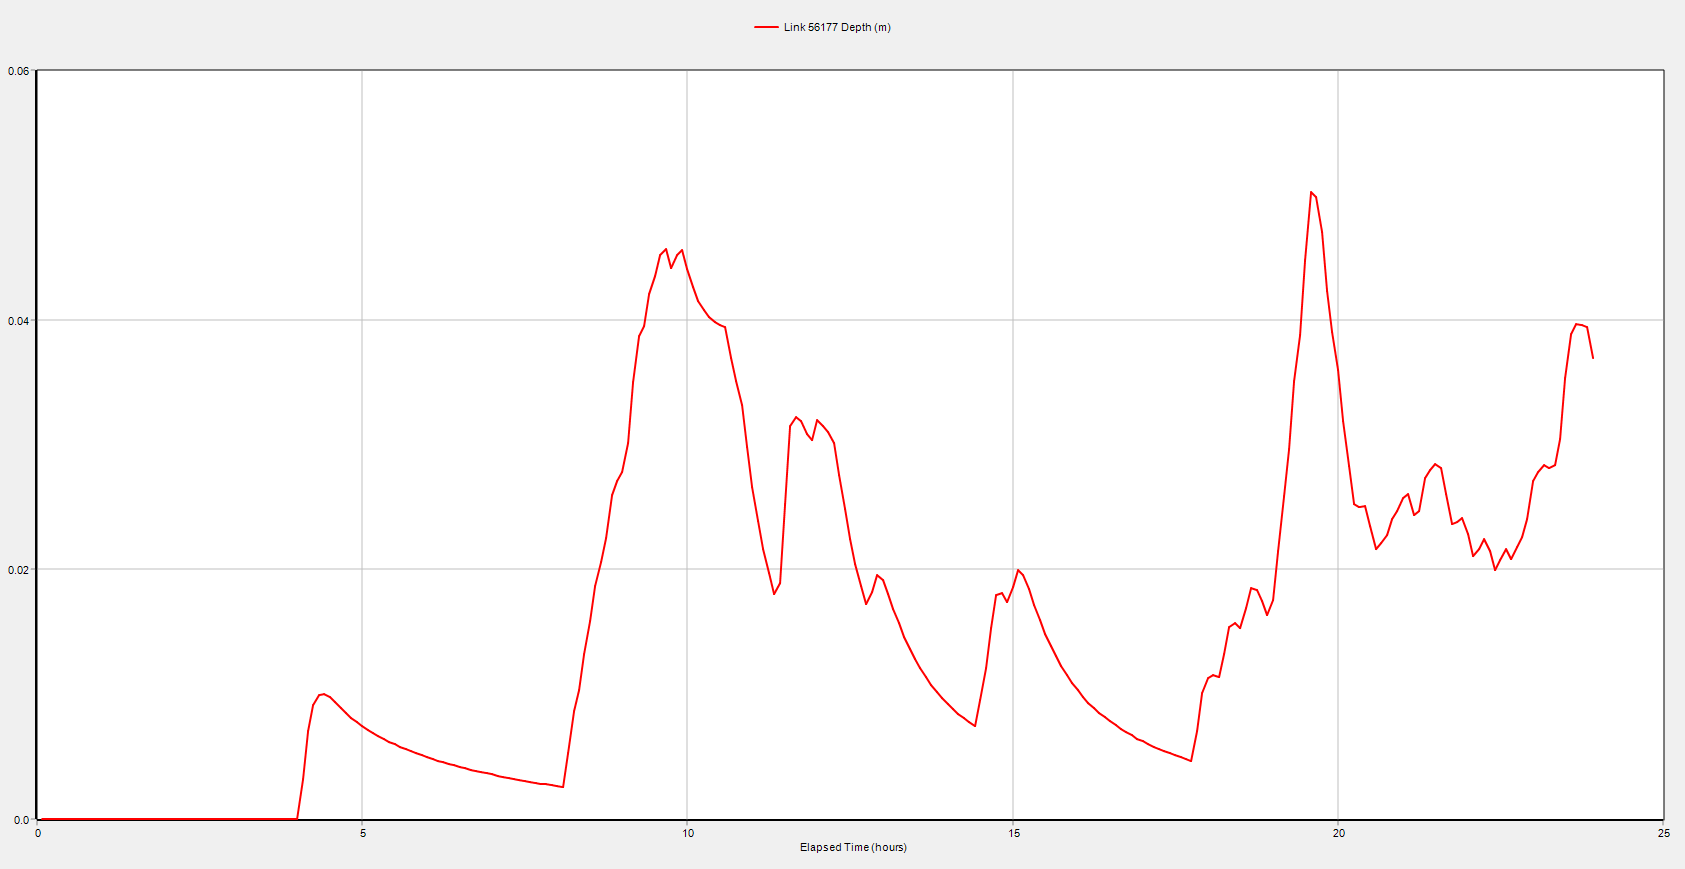

In [ ]:
# Get Results for Volume of Links 56177
link_n = '56177'
with Simulation(data_file) as sim:
    link_object = Links(sim)
    n, volume = [],[]
    sim.step_advance(300)
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        volume.append(link_object[link_n].volume)

# 8. RainGage in PySWMM

In [ ]:
# Load and Get number of RainGages

with Simulation(data_file) as sim:
    raingage_object = RainGages(sim)
    n_raingage = []
    for rain in raingage_object:
        print(rain.raingageid)
        n_raingage.append(rain)
    print('Number of RainGages: ', len(n_raingage))

# 9. SubCatchment in PySWMM

In [ ]:
# Load and Get number of SubCatchments

with Simulation(data_file) as sim:
    subcatch_object = Subcatchments(sim)
    n_subcatch = []
    for subcatch in subcatch_object:
        n_subcatch.append(subcatch)
    print('Number of SubCatchments: ', len(n_subcatch))

In [ ]:
# Get Name of SubCatchments

with Simulation(data_file) as sim:
    subcatch_object = Subcatchments(sim)
    name_sub = []
    for subcatch in subcatch_object:
        name_sub.append(subcatch.subcatchmentid)
    #print(name_sub)

### 9.1. Get-Set Functions

In [ ]:
# Get/Set Area of SubCatchments SubCatch_128

subcatch_n = 'SubCatch_128'
with Simulation(data_file) as sim:
    subcatch_object = Subcatchments(sim)
    subcatch_area_before = subcatch_object[subcatch_n].area
    subcatch_object[subcatch_n].area = 20
    subcatch_area_after = subcatch_object[subcatch_n].area
    print('Area before: ', subcatch_area_before)
    print('Area after: ', subcatch_area_after)

In [ ]:
# Get/Set Flow Width of SubCatchments SubCatch_128

subcatch_n = 'SubCatch_128'
with Simulation(data_file) as sim:
    subcatch_object = Subcatchments(sim)
    flow_width_before = subcatch_object[subcatch_n].width
    subcatch_object[subcatch_n].width = 20
    flow_width_after = subcatch_object[subcatch_n].width
    print('Flow Width before: ', flow_width_before)
    print('Flow Width after: ', flow_width_after)

In [ ]:
# Get Outlet name of SubCatchments SubCatch_128

subcatch_n = 'SubCatch_128'
with Simulation(data_file) as sim:
    subcatch_object = Subcatchments(sim)
    print(subcatch_object[subcatch_n].connection[1])

In [ ]:
# Get/Set Percentage Slope of SubCatchments SubCatch_128
subcatch_n = 'SubCatch_128'
with Simulation(data_file) as sim:
    subcatch_object = Subcatchments(sim)
    slope_before = subcatch_object[subcatch_n].slope
    subcatch_object[subcatch_n].slope = 20
    slope_after = subcatch_object[subcatch_n].slope
    print('Percentage Slope before: ', slope_before)
    print('Percentage Slope after: ', slope_after)

In [ ]:
# Get Percent Impervious of SubCatchments SubCatch_128

subcatch_n = 'SubCatch_128'
with Simulation(data_file) as sim:
    subcatch_object = Subcatchments(sim)
    impervious_before = subcatch_object[subcatch_n].percent_impervious
    #subcatch_object[subcatch_n].percent_impervious = 20
    #impervious_after = subcatch_object[subcatch_n].percent_impervious
    print('Percent Impervious before: ', impervious_before)
    #print('Percent Impervious after: ', impervious_after)

### 9.2. Get Simulation Results

In [ ]:
# Get Results of Evaporation Loss of SubCatchments SubCatch_128

subcatch_n = 'SubCatch_128'
with Simulation(data_file) as sim:
    subcatch_object = Subcatchments(sim)
    n, eva_loss = [],[]
    sim.step_advance(300)
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        eva_loss.append(subcatch_object[subcatch_n].evaporation_loss)

In [ ]:
# Plot Evaporation Loss of SubCatchments SubCatch_128

plt.plot(n, eva_loss)
plt.xticks(n[::20], rotation=90)
plt.xlabel('Time', fontsize=15) 
plt.ylabel('Evaporation Loss', fontsize=15)
plt.title("Evaporation Loss at SubCatchment " +  link_n + " calculated from PySWMM", fontsize=20)
plt.show()

In [ ]:
# Get Results of Infitration Loss of SubCatchments SubCatch_128

subcatch_n = 'SubCatch_128'
with Simulation(data_file) as sim:
    subcatch_object = Subcatchments(sim)
    n, infi_loss = [],[]
    sim.step_advance(300)
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        infi_loss.append(subcatch_object[subcatch_n].infiltration_loss)

In [ ]:
# Get Results of Run on of SubCatchments SubCatch_128

subcatch_n = 'SubCatch_128'
with Simulation(data_file) as sim:
    subcatch_object = Subcatchments(sim)
    n, runon = [],[]
    sim.step_advance(300)
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        runon.append(subcatch_object[subcatch_n].runon)

In [ ]:
# Get Results of Run off of SubCatchments SubCatch_128

subcatch_n = 'SubCatch_128'
with Simulation(data_file) as sim:
    subcatch_object = Subcatchments(sim)
    n, runoff = [],[]
    sim.step_advance(300)
    for step in sim:
        n.append(sim.current_time.strftime('%m/%d/%Y %H:%M:%S'))        
        runoff.append(subcatch_object[subcatch_n].runoff)

# Discussion

## Advantages
    - Can execute SWMM model automatically
     - Can design many SWMM scenarios (by changing ), run, and get results
     - Can be used to calibrate SWMM model automatically (trails and errors approach)
     - Can adjust many properties of components for multi-simulation:
         + Node: Inflow, Invert Elevation, Max. Depth, Initial Depth, Surcharge Depth, Ponded Area
         + Link: Inlet/Outlet Offset, Inital Flow, Maximum Flow, Entry/Exit/Avg. Loss Coefficient
         + SubCatchment: Area, Width, %Slope

## Disadvantages
     - Do not have many functions (compare to EPANET-MATLAB Toolkit)
     - Time steps are not the same, difficult for comparing simulated values to measured values (interpolation can be used)
     - Cannot change some properties of components for multi-simulation:
         + Link: Shape, Max. Depth, Roughness
         + SubCatchment: Outlet, Rain Gage, %Imperviousness, N-Imperviousness, N-Perviousness, DStore-Imperviousness, DStore-Perviousness